In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd

train_sheet_id = "1LummUrALksBOBaEiU30ZBWYfBfQXCQOoz2y4rk7gQms"
train_url = f"https://docs.google.com/spreadsheets/d/{train_sheet_id}/export?format=csv"

test_sheet_id = "1w6HxhTWhnvH0qfcJb4ZmzhsOiRdbHeOXWf-DYJEudUg"
test_url = f"https://docs.google.com/spreadsheets/d/{test_sheet_id}/export?format=csv"

test_df = pd.read_csv(test_url)
train_df = pd.read_csv(train_url)
#sample_submission_df = pd.read_csv("sample_submission.csv")

In [3]:
test_df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,630000,24,other,ba,6.85,65.2,yes,5.2,poor,group study,high,easy
1,630001,18,male,diploma,6.61,45.0,no,9.3,poor,coaching,low,easy
2,630002,24,female,b.tech,6.60,98.5,yes,6.2,good,group study,medium,moderate
3,630003,24,male,diploma,3.03,66.3,yes,5.7,average,mixed,medium,moderate
4,630004,20,female,b.tech,2.03,42.4,yes,9.2,average,coaching,low,moderate


In [4]:
train_df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [5]:
type(train_df)

pandas.core.frame.DataFrame

In [6]:
train_df.columns

Index(['id', 'age', 'gender', 'course', 'study_hours', 'class_attendance',
       'internet_access', 'sleep_hours', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [7]:
train_df.count()

id                  630000
age                 630000
gender              630000
course              630000
study_hours         630000
class_attendance    630000
internet_access     630000
sleep_hours         630000
sleep_quality       630000
study_method        630000
facility_rating     630000
exam_difficulty     630000
exam_score          630000
dtype: int64

In [8]:
train_df[train_df.duplicated(keep=False)]
#no duplicate rows present

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score


In [9]:
train_df.describe()
#helps describe all the numerical columns

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


In [10]:
#gender - has 3 categories 
# Balanced Data category in proportion of 1.002 : 1 : 0.989 for (other : male : female)
train_df['gender'].value_counts()

gender
other     211097
male      210593
female    208310
Name: count, dtype: int64

In [11]:
train_df['age'].value_counts()
# age range is from 17-24 
# data is almost in proportion


age
21    86620
23    82872
20    80742
19    78885
24    77111
18    75632
22    74950
17    73188
Name: count, dtype: int64

In [12]:
train_df['course'].value_counts()
# unbalanced classes - diploma data points are very less almost 1/3rd of the b.tech.

course
b.tech     131236
b.sc       111554
b.com      110932
bca         88721
bba         75644
ba          61989
diploma     49924
Name: count, dtype: int64

In [68]:
print("Summary Statistics:")
train_df.groupby('course')['exam_score'].describe()


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
course,,,,,,,,
b.com,110932.0,62.537726,18.404936,19.599,49.4,62.2,75.9,100.0
b.sc,111554.0,62.295491,19.297236,19.599,48.3,63.1,76.1,100.0
b.tech,131236.0,62.519707,18.862381,19.599,48.7,62.4,76.6,100.0
ba,61989.0,61.886931,18.765944,19.599,47.9,62.3,75.2,100.0
bba,75644.0,63.232038,19.159462,19.599,49.4,63.6,77.6,100.0
bca,88721.0,62.586227,18.921838,19.599,48.6,62.6,76.1,100.0
diploma,49924.0,62.404354,19.094986,19.599,48.8,61.8,76.0,100.0


In [13]:
train_df['internet_access'].value_counts()
#  unbalanced class - yes is 10 times the value of no although intuitively it can be true distribution -- would need to confirm

internet_access
yes    579423
no      50577
Name: count, dtype: int64

In [14]:
train_df['sleep_quality'].value_counts()
#proportionate - distribution

sleep_quality
poor       213675
good       213089
average    203236
Name: count, dtype: int64

In [15]:
train_df['study_method'].value_counts()
#baanced data

study_method
coaching         131697
self-study       131131
mixed            123086
group study      123009
online videos    121077
Name: count, dtype: int64

In [16]:
train_df['facility_rating'].value_counts()
#baanced data
# but question - this is subjective column isnt it?
# should we take this or not?

facility_rating
medium    214082
low       212378
high      203540
Name: count, dtype: int64

In [17]:
train_df['exam_difficulty'].value_counts()
# unbalanced data


exam_difficulty
moderate    353982
easy        176540
hard         99478
Name: count, dtype: int64

In [18]:
# #Results as of now :
# Unbalanced data in columns: internet access, exam difficulty and course. 
# Outliers as such there is None from IQR method. 

# now I need to find the correlation;
# first normalize the columns data and convert it into a numerical from
# I also need to check what is feature selection and how and when to do it. 


In [19]:
# First we need to clculate the correlation metrix between all the features and the exam score (target variable)

train_df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [35]:
#for correlation matrix df.corr() gives pearon coefficient 
# Conditions for pearson and spearman coefficient - numerical data is required 
# We can also calculate te covariance - but ppearson is always the good alternative.- but it assumes linearity in the relation. 
# 1st calculate the covariance matrix 

# convert all the features to numerical values. 

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

In [21]:
le = LabelEncoder()
train_df['gender_encoder'] = le.fit_transform(train_df['gender'])
train_df['internet_access_encoder'] = le.fit_transform(train_df['internet_access'])
train_df['course_encoder'] = le.fit_transform(train_df['course'])
train_df['sleep_quality_encoder'] = le.fit_transform(train_df['sleep_quality'])
train_df['study_method_encoder'] = le.fit_transform(train_df['study_method'])
train_df['facility_rating_encoder'] = le.fit_transform(train_df['facility_rating'])
train_df['exam_difficulty_encoder'] = le.fit_transform(train_df['exam_difficulty'])

In [22]:
train_df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,gender_encoder,internet_access_encoder,course_encoder,sleep_quality_encoder,study_method_encoder,facility_rating_encoder,exam_difficulty_encoder
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3,0,0,1,0,3,1,0
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7,2,1,6,2,4,2,2
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0,0,1,1,2,0,0,2
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9,1,1,1,0,1,0,2
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0,1,1,5,1,4,0,0


In [23]:
#covariance matrix
num_feature_df = train_df[['id', 'gender_encoder', 'course_encoder', 'study_hours', 'class_attendance', 'internet_access_encoder', 'sleep_hours', 'sleep_quality_encoder', 'study_method_encoder', 'facility_rating_encoder', 'exam_difficulty_encoder', 'exam_score']]
cov_matrix_pd = num_feature_df.cov()
target_cov_matrix = cov_matrix_pd[['exam_score']]

In [24]:
target_cov_matrix

,exam_score
id,1280.209869
gender_encoder,0.073287
course_encoder,0.140845
study_hours,34.028820
class_attendance,119.014916
internet_access_encoder,0.002299
sleep_hours,5.525598
sleep_quality_encoder,-1.919327
study_method_encoder,-4.975670
facility_rating_encoder,-1.179604


In [25]:
pearson_corr_matrix = num_feature_df.corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr_matrix[['exam_score']])

Pearson Correlation Matrix:
                         exam_score
id                         0.000372
gender_encoder             0.004748
course_encoder             0.003874
study_hours                0.762267
class_attendance           0.360954
internet_access_encoder    0.000447
sleep_hours                0.167410
sleep_quality_encoder     -0.124749
study_method_encoder      -0.183431
facility_rating_encoder   -0.076605
exam_difficulty_encoder    0.008337
exam_score                 1.000000


In [26]:
spearman_corr_matrix = num_feature_df.corr(method='spearman')
print("Spearman Correlation Matrix:")
print(spearman_corr_matrix[['exam_score']])

Spearman Correlation Matrix:
                         exam_score
id                         0.000247
gender_encoder             0.005316
course_encoder             0.003281
study_hours                0.769757
class_attendance           0.351515
internet_access_encoder    0.002793
sleep_hours                0.160048
sleep_quality_encoder     -0.121658
study_method_encoder      -0.176620
facility_rating_encoder   -0.072773
exam_difficulty_encoder    0.006986
exam_score                 1.000000


In [62]:
import matplotlib.pyplot as plt

def plot_category_distribution(
    df,
    category_col,
    numeric_col,
    bins=80,
    min_kde_samples=20
):
    categories = df[category_col].dropna().unique()

    # =========================
    # 1️⃣ SIDE-BY-SIDE PLOTS
    # =========================
    fig, axes = plt.subplots(
        1,
        len(categories),
        figsize=(6 * len(categories), 5),
        sharey=True
    )

    if len(categories) == 1:
        axes = [axes]

    for ax, cat in zip(axes, categories):
        data = df[df[category_col] == cat][numeric_col].dropna()

        ax.hist(
            data,
            bins=bins,
            density=True,
            alpha=0.6
        )

        if len(data) >= min_kde_samples:
            data.plot(kind='kde', ax=ax)

        ax.set_title(f"{category_col} = {cat}")
        ax.set_xlabel(numeric_col)
        ax.set_ylabel("Density")

    plt.tight_layout()
    plt.show()

    # =========================
    # 2️⃣ OVERLAPPING PLOT
    # =========================
    plt.figure(figsize=(10, 6))

    for cat in categories:
        data = df[df[category_col] == cat][numeric_col].dropna()

        plt.hist(
            data,
            bins=bins,
            density=True,
            alpha=0.35,
            label=str(cat)
        )

        if len(data) >= min_kde_samples:
            data.plot(kind='kde', linewidth=2)

        # Mean line
        plt.axvline(
            data.mean(),
            linestyle='--',
            alpha=0.7
        )

    plt.title(f"Overlapping {numeric_col} Distribution by {category_col}")
    plt.xlabel(numeric_col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    # =========================
    # 3️⃣ SUMMARY STATS
    # =========================
    print("Summary Statistics:")
    display(
        df.groupby(category_col)[numeric_col].describe()
    )


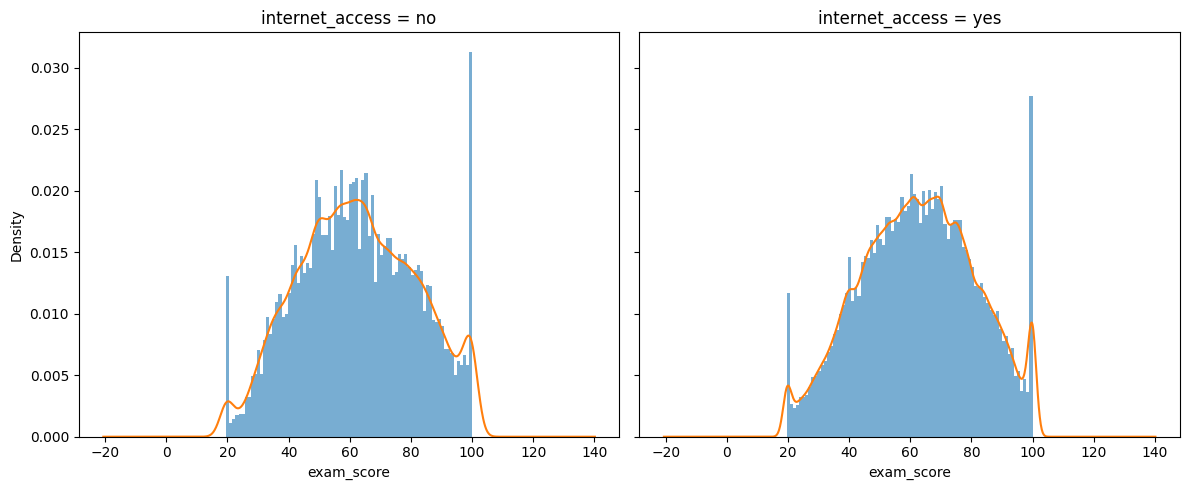

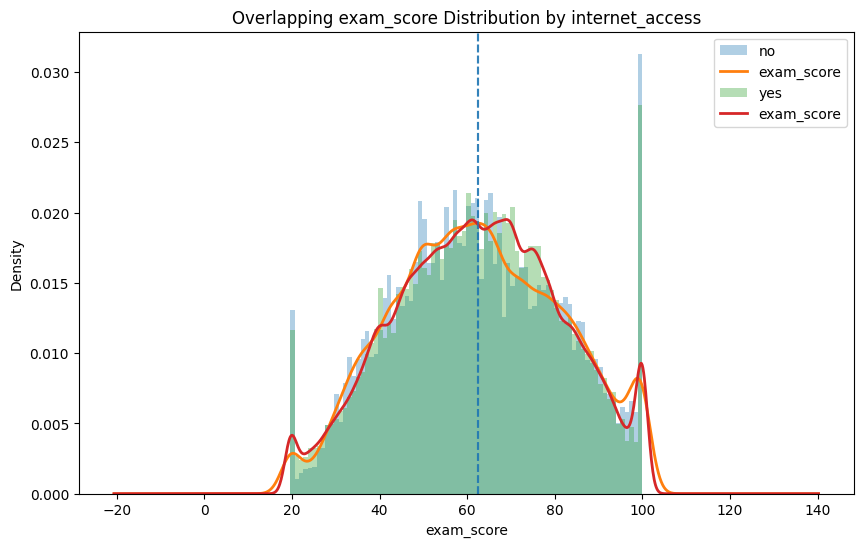

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
internet_access,,,,,,,,
no,50577.0,62.478038,19.277820,19.599,48.5,61.9,77.0,100.0
yes,579423.0,62.509172,18.885066,19.599,48.8,62.6,76.2,100.0


In [63]:
plot_category_distribution(
    train_df,
    category_col='internet_access',
    numeric_col='exam_score'
)


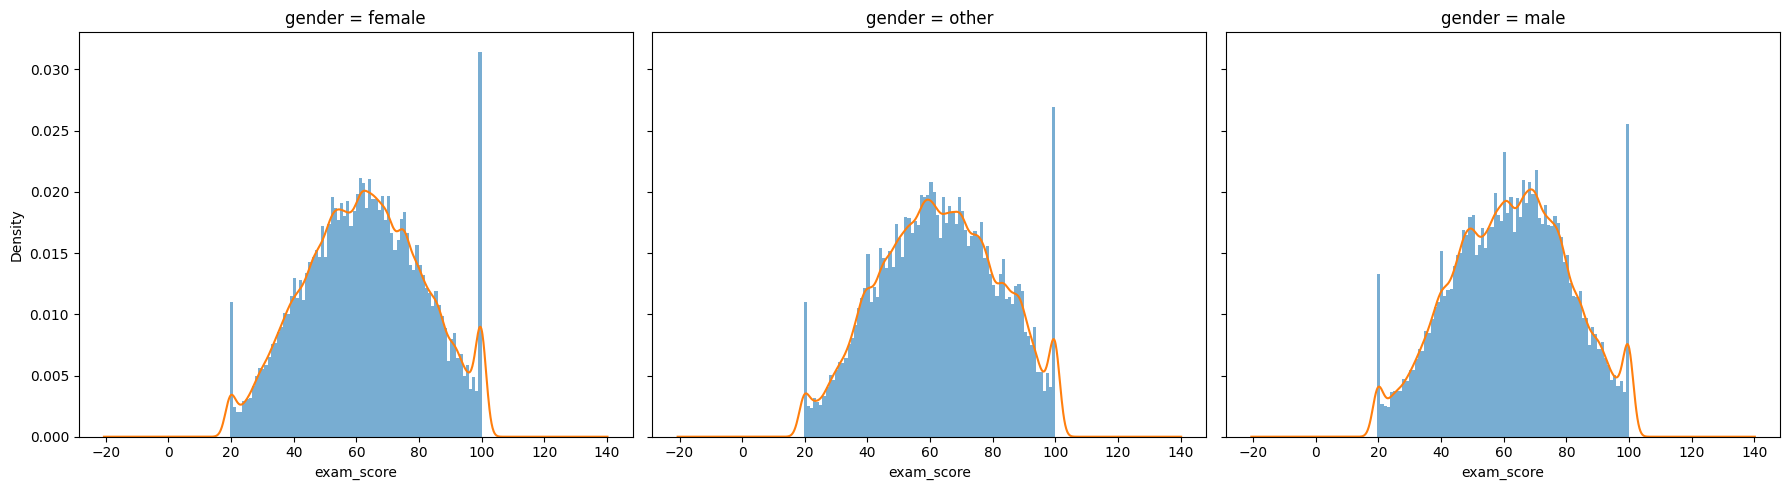

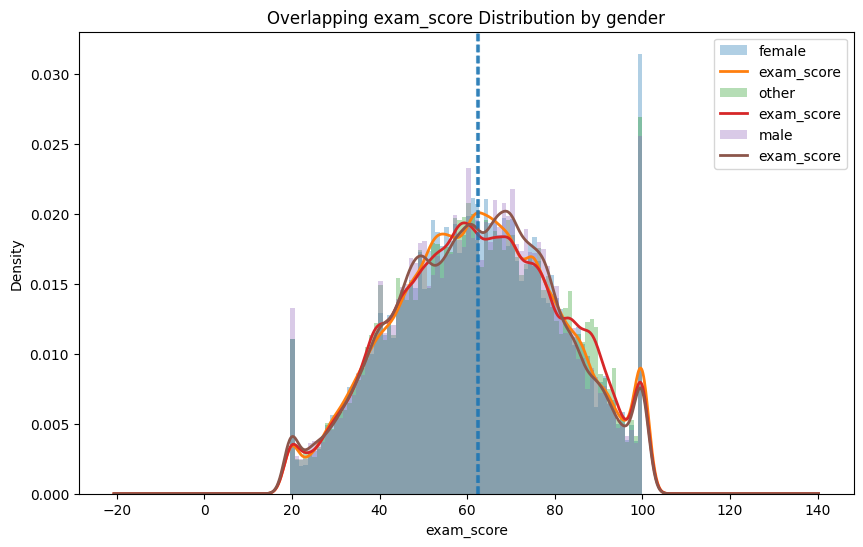

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,208310.0,62.563220,18.891115,19.599,49.1,62.5,76.1,100.0
male,210593.0,62.175561,18.765553,19.599,48.5,62.5,75.8,100.0
other,211097.0,62.781191,19.087020,19.599,48.9,62.6,76.9,100.0


In [64]:
plot_category_distribution(
    train_df,
    category_col='gender',
    numeric_col='exam_score'
)


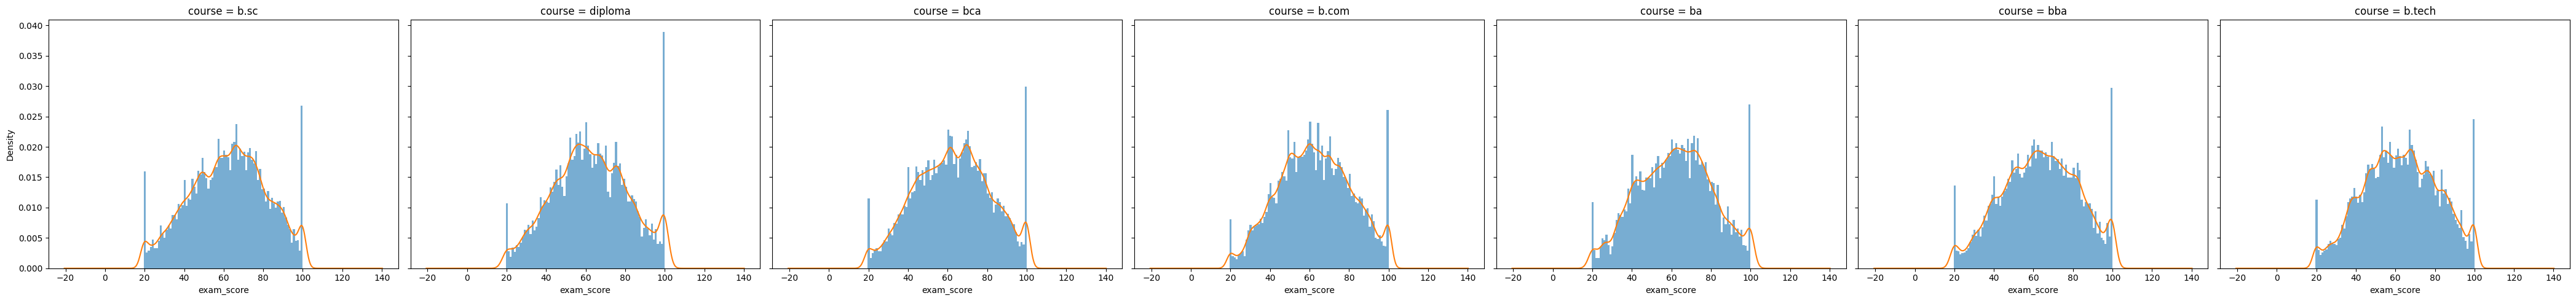

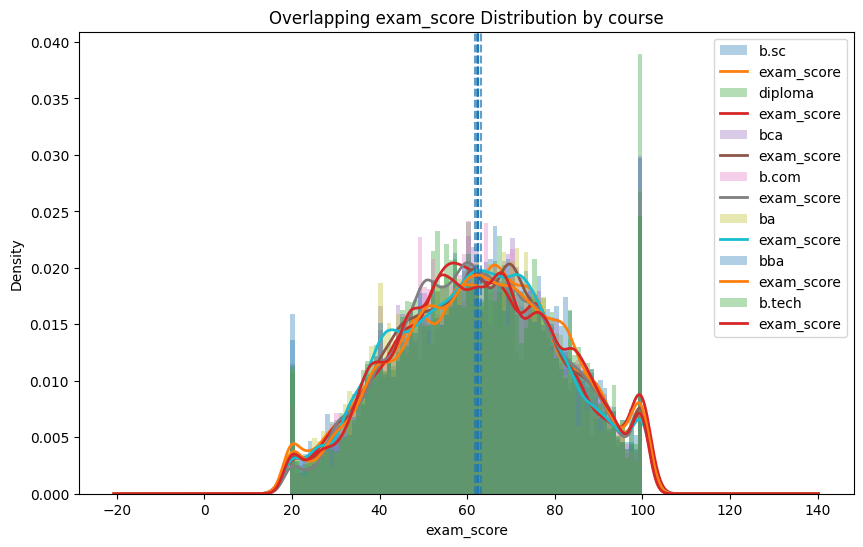

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
course,,,,,,,,
b.com,110932.0,62.537726,18.404936,19.599,49.4,62.2,75.9,100.0
b.sc,111554.0,62.295491,19.297236,19.599,48.3,63.1,76.1,100.0
b.tech,131236.0,62.519707,18.862381,19.599,48.7,62.4,76.6,100.0
ba,61989.0,61.886931,18.765944,19.599,47.9,62.3,75.2,100.0
bba,75644.0,63.232038,19.159462,19.599,49.4,63.6,77.6,100.0
bca,88721.0,62.586227,18.921838,19.599,48.6,62.6,76.1,100.0
diploma,49924.0,62.404354,19.094986,19.599,48.8,61.8,76.0,100.0


In [65]:
plot_category_distribution(
    train_df,
    category_col='course',
    numeric_col='exam_score'
)


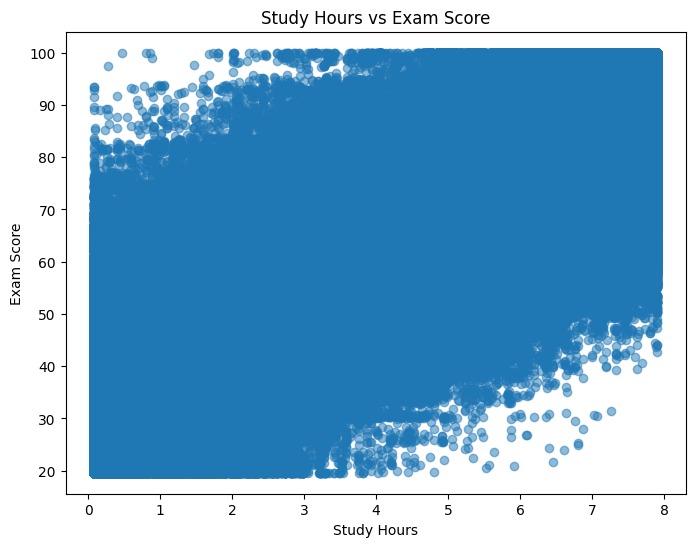

In [69]:


plt.figure(figsize=(8, 6))
plt.scatter(
    train_df['study_hours'],
    train_df['exam_score'],
    alpha=0.5
)

plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()


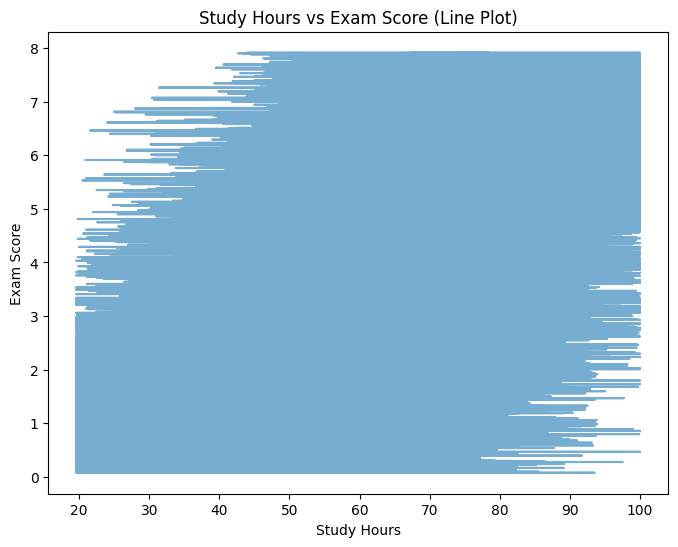

In [71]:
sorted_df = train_df.sort_values('study_hours')

plt.figure(figsize=(8, 6))
plt.plot(
    sorted_df['exam_score'],
    sorted_df['study_hours'],
    alpha=0.6
)

plt.title('Study Hours vs Exam Score (Line Plot)')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.show()
